<a href="https://colab.research.google.com/github/PingMoon93/PingMoon93/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Kaggle /train house pricee.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 加载数据
train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Kaggle /train house pricee.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Kaggle /test house prices.csv')

# 分割特征和目标变量，并去掉目标变量列
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']
X_test = test_data.copy()

# 处理缺失值
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# 用均值填充数值缺失值
imputer_numeric = SimpleImputer(strategy='mean')
X_train[numeric_features] = imputer_numeric.fit_transform(X_train[numeric_features])
X_test[numeric_features] = imputer_numeric.transform(X_test[numeric_features])

# 用众数填充分类缺失值
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical_features] = imputer_categorical.fit_transform(X_train[categorical_features])
X_test[categorical_features] = imputer_categorical.transform(X_test[categorical_features])

# 编码分类变量
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 对齐训练和测试数据的列
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 标准化数值变量
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 训练模型 (示例：使用随机森林)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 对测试数据进行预测
y_pred = model.predict(X_test)

# 将预测结果添加到测试数据中
test_data['SalePrice'] = y_pred

# 保存结果到CSV文件
output_path = '/content/drive/MyDrive/Machine Learning/Kaggle /test house prices.csv'
test_data[['Id', 'SalePrice']].to_csv(output_path, index=False)

print(f'预测结果已保存到 {output_path}')


预测结果已保存到 /content/drive/MyDrive/Machine Learning/Kaggle /test house prices.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 分割特征和目标变量
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# 用均值填充数值缺失值
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_features] = imputer_numeric.fit_transform(X[numeric_features])

# 用众数填充分类缺失值
categorical_features = X.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_categorical.fit_transform(X[categorical_features])

# 编码分类变量
X = pd.get_dummies(X)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数值变量
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 初始化模型
lr = LinearRegression()

# 训练模型
lr.fit(X_train, y_train)

# 预测
y_pred = lr.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'mse of LinearRegression: {mse:.2f}')


mse of LinearRegression: 695825955366688786131670511124480.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 初始化模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'随机森林的均方误差: {mse:.2f}')


随机森林的均方误差: 851108673.80


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Kaggle /test house prices.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 初始化和训练梯度提升树
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# 预测和评估
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f'梯度提升树的均方误差: {mse_gb:.2f}')
print(f'梯度提升树的均方根误差: {rmse_gb:.2f}')


梯度提升树的均方误差: 755317029.00
梯度提升树的均方根误差: 27483.03


In [ ]:
from sklearn.neural_network import MLPRegressor

# 初始化和训练神经网络
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 预测和评估
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
print(f'神经网络的均方误差: {mse_mlp:.2f}')
print(f'神经网络的均方根误差: {rmse_mlp:.2f}')


神经网络的均方误差: 1420768815.62
神经网络的均方根误差: 37693.09


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from xgboost import XGBRegressor

# 初始化模型
xgb = XGBRegressor(n_estimators=100, random_state=42)

# 训练模型
xgb.fit(X_train, y_train)

# 预测
y_pred = xgb.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost的均方误差: {mse:.2f}')


XGBoost的均方误差: 759264325.50


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

        Feature  Importance
4   OverallQual    0.578985
16    GrLivArea    0.108885
12  TotalBsmtSF    0.037638
14     2ndFlrSF    0.032119
9    BsmtFinSF1    0.029914
26   GarageCars    0.024324
13     1stFlrSF    0.024040
27   GarageArea    0.012520
3       LotArea    0.012308
6     YearBuilt    0.008567


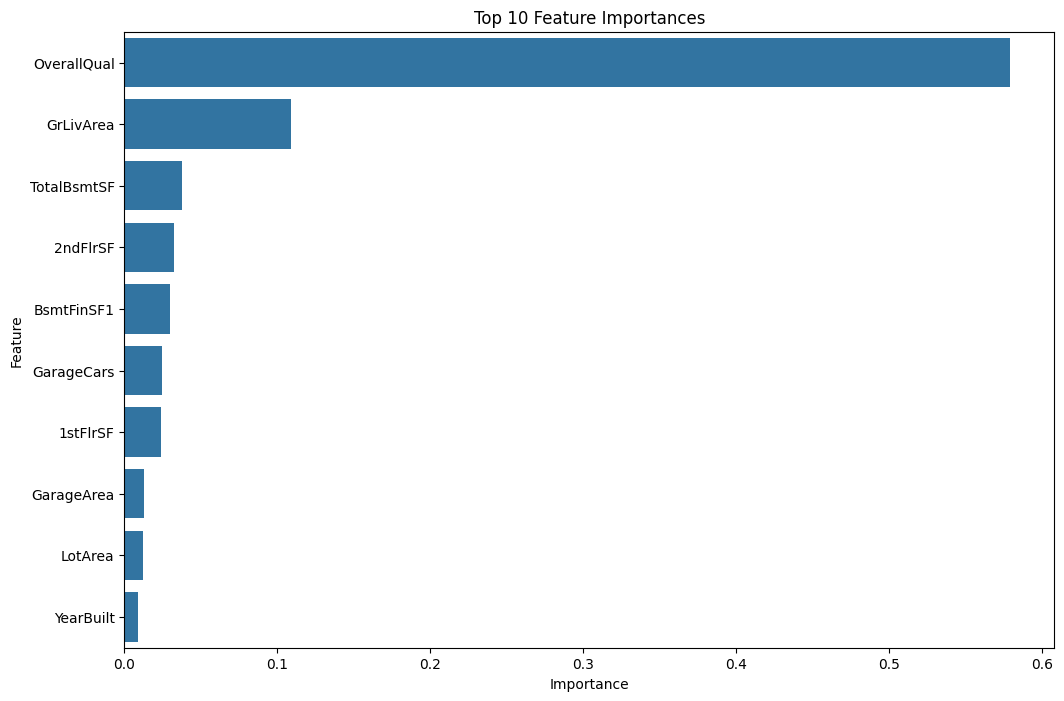

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 分割特征和目标变量
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# 处理缺失值
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 用均值填充数值缺失值
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_features] = imputer_numeric.fit_transform(X[numeric_features])

# 用众数填充分类缺失值
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_categorical.fit_transform(X[categorical_features])

# 编码分类变量
X = pd.get_dummies(X)

# 标准化数值变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_scaled, y)

# 计算特征重要性
importances = rf.feature_importances_
feature_names = X.columns

# 创建特征重要性数据框
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 排序
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 打印前10个重要特征
print(feature_importances.head(10))

# 可视化特征重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 初始化和训练决策树
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# 预测和评估
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print(f'决策树的均方误差: {mse_tree:.2f}')
print(f'决策树的均方根误差: {rmse_tree:.2f}')


决策树的均方误差: 1858717625.11
决策树的均方根误差: 43112.85
